<a href="https://colab.research.google.com/github/ashwini-31/ashwini-31/blob/main/inventory_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [29]:
item_prices = {
    'whole milk': 45,
    'other vegetables': 30,
    'rolls/buns': 25,
    'soda': 20,
    'yogurt': 15,
    'bottled water': 10,
    'bread': 25,
    'sausage': 50,
    'pastry': 35,
    'fruit/vegetable juice': 22,
    # ...add more if needed
}


In [30]:
df = pd.read_csv("groceries - groceries.csv")

In [31]:
all_items = df.iloc[:, 1:].values.flatten()
all_items = [item.strip().lower() for item in all_items if pd.notna(item)]


In [32]:
item_counts = Counter(all_items)

In [33]:
item_freq_df = pd.DataFrame(item_counts.items(), columns=['Item', 'Frequency'])
item_freq_df = item_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

In [34]:
#export to excel file


In [35]:
item_freq_df.to_excel("grocery_inventory_frequency.xlsx", index=False)
print("📁 Inventory frequency report saved as 'grocery_inventory_frequency.xlsx'.")

📁 Inventory frequency report saved as 'grocery_inventory_frequency.xlsx'.


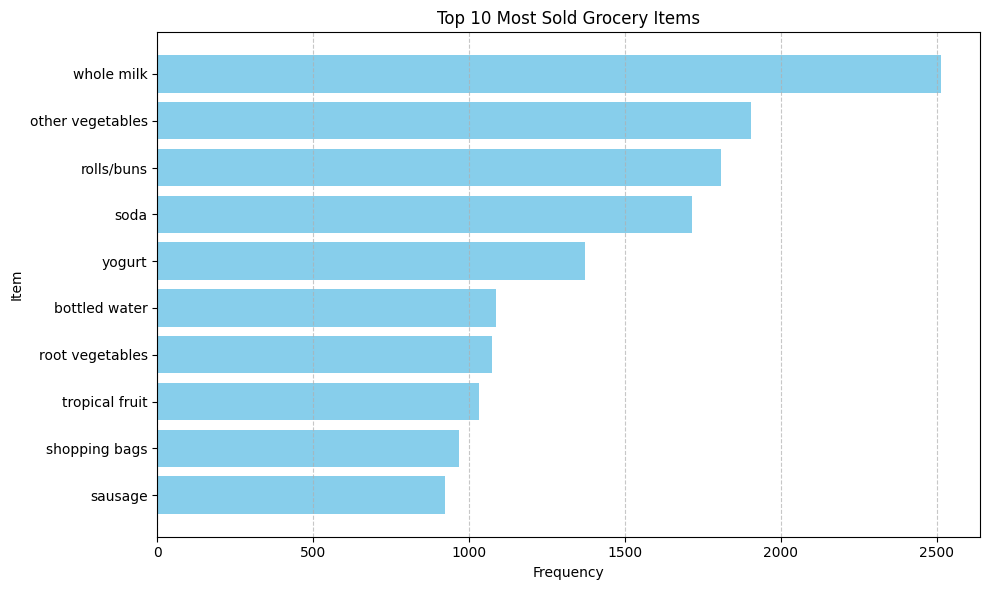

In [36]:
top_10 = item_freq_df.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10['Item'][::-1], top_10['Frequency'][::-1], color='skyblue')
plt.title('Top 10 Most Sold Grocery Items')
plt.xlabel('Frequency')
plt.ylabel('Item')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [37]:
print("\n🔽 Bottom 10 Least Sold Items:")
print(item_freq_df.tail(10).to_string(index=False))


🔽 Bottom 10 Least Sold Items:
                 Item  Frequency
       salad dressing          8
               whisky          8
       toilet cleaner          7
       baby cosmetics          6
       frozen chicken          6
                 bags          4
      kitchen utensil          4
preservation products          2
            baby food          1
 sound storage medium          1


In [38]:
report_rows = []


In [39]:
def search_item_detailed(item_name):
    item_name_lower = item_name.lower()
    if item_name_lower in item_counts:
        count = item_counts[item_name_lower]
        price = item_prices.get(item_name_lower, None)
        print(f"\n🛒 Item: {item_name.capitalize()}")
        print(f"🔢 Sold: {count} times")

        if price is not None:
            revenue = count * price
            print(f"💰 Price per unit: ₹{price}")
            print(f"💵 Total Revenue: ₹{revenue}")

            report_rows.append({
                "Item": item_name.capitalize(),
                "Units Sold": count,
                "Price per Unit (₹)": price,
                "Total Revenue (₹)": revenue
            })

        else:
            print("⚠️ Price not found for this item. Cannot compute total revenue.")
            report_rows.append({
                "Item": item_name.capitalize(),
                "Units Sold": count,
                "Price per Unit (₹)": "N/A",
                "Total Revenue (₹)": "N/A"
            })
    else:
        print(f"\n❌ '{item_name}' not found in inventory.")


In [40]:
# search loop

In [42]:
while True:
    user_input = input("\nEnter item name for detailed report (or type 'exit' to finish & export): ")
    if user_input.lower() == 'exit':
        break
    search_item_detailed(user_input)



Enter item name for detailed report (or type 'exit' to finish & export): whisky

🛒 Item: Whisky
🔢 Sold: 8 times
⚠️ Price not found for this item. Cannot compute total revenue.

Enter item name for detailed report (or type 'exit' to finish & export): sausage

🛒 Item: Sausage
🔢 Sold: 924 times
💰 Price per unit: ₹50
💵 Total Revenue: ₹46200

Enter item name for detailed report (or type 'exit' to finish & export): bottled water

🛒 Item: Bottled water
🔢 Sold: 1087 times
💰 Price per unit: ₹10
💵 Total Revenue: ₹10870

Enter item name for detailed report (or type 'exit' to finish & export): pastry

🛒 Item: Pastry
🔢 Sold: 875 times
💰 Price per unit: ₹35
💵 Total Revenue: ₹30625

Enter item name for detailed report (or type 'exit' to finish & export): exit


In [43]:
# Export the final report to Excel
if report_rows:
    report_df = pd.DataFrame(report_rows)
    report_df.to_excel("detailed_item_sales_report.xlsx", index=False)
    print("\n✅ Report saved as 'detailed_item_sales_report.xlsx'")
else:
    print("\n⚠️ No data to export. No items were searched.")



✅ Report saved as 'detailed_item_sales_report.xlsx'


In [ ]:
from google.colab import files
files.download("grocery_inventory_frequency.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>